

# Project: TMDb Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains many features of movies over the past decades. We will first check the validality of the variables and select several of them for further exploration. There are two main questions throughout the analysis. One is the features of good movies and bad movies. Another one is related to profit.

Import the packages and magic words

In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling


### General Properties

Load your data and print out a few lines. Perform operations to inspect data
types and look for instances of missing or possibly errant data.

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Get familiar with the data structure

In [3]:
df.shape

(10866, 21)

Observe the statistic features of our dataset.

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Findings: There are lots of data (more than 50%) whose budget and revenue are 0, which not reasonable.

Check the data type to see if there's errant data type.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

It seems the data types are reasonable enough. So no need to do further data type transfer.



### Data Cleaning: Duplicates, Null and Select useful variables for further analysis

Check missing data

In [26]:
df.isnull().sum() 

id                         0
popularity                 0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Core data is not missing, such as budget, revenue

Choose several core indicators and drop the useless columns

In [3]:
df.drop(['imdb_id','budget','revenue','cast','homepage','tagline','keywords','overview'],axis=1,inplace=True)


In [5]:
df.columns

Index(['id', 'popularity', 'original_title', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

Check the duplicates and drop them if any

In [6]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)


Check if the duplicates have been dropped

In [8]:
df.duplicated().sum()

0

Select revenue and budget bigger than $10000


In [5]:
df2=df[(df['revenue_adj'] >10000) & (df['budget_adj'] >10000)]

Overview of our cleaned data

In [46]:
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03,3.801000e+03
mean,39675.340437,1.201631,109.374901,533.757169,6.173560,2001.234149,4.472867e+07,1.389112e+08
std,67207.328794,1.482512,19.855417,884.422875,0.791992,11.304070,4.485730e+07,2.170115e+08
min,5.000000,0.001117,26.000000,10.000000,2.200000,1960.000000,1.577503e+04,1.016400e+04
25%,5966.000000,0.467233,96.000000,73.000000,5.700000,1995.000000,1.354637e+07,1.948739e+07
50%,11282.000000,0.807590,106.000000,207.000000,6.200000,2004.000000,3.038360e+07,6.311117e+07
75%,38356.000000,1.387163,119.000000,584.000000,6.700000,2010.000000,6.081498e+07,1.658054e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Limitation 1: We dropped a lot of data because there are a large portion of movies whose budget are 0 in the original data set. Accordingly, the number of samples will be largely decreased.


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: What are the features of good movies and bad movies? Who are producing the good movies?

Reasoning: We want to classify good movies and bad movies, so we need to define an index to help us evaluate the movies.

Define a score to evaluate the quality of movie. Assume the score is reflecting three dimentional: profit, popularity and vote_average. I'm going to use weighted average method to calculate the score. profit:50%; popularity:25%;vote_average:25%

Data normalization (using Min-maxnormalization)

In [6]:
def nor(x):
    x=(x-min(x))/(max(x)-min(x))
    return x
    

Define Profit=revenue-budget, then apply the formula to calculate "score" of each movie

In [7]:
df2['profit']=df2.revenue_adj-df2.budget_adj
df2['score']=nor(df2.profit)*0.5+nor(df2.popularity)*0.25+nor(df2.vote_average)*0.25

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Limitations 2: For the calculation of movie score, I'm using different percent of weight to evaluate the importance of different factors related to a good movies. I put the profit at highest place, which is an objective assumption.

Take a look at the result

In [17]:
df2.head(1)

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.68703


In [20]:
df2.shape

(3801, 15)

Sort by score

In [8]:
df2=df2.sort_values('score',axis=0,ascending=False)

Seperate the top 10% score as good movies and down 10% as bad movies

In [9]:
df2_good=df2[:int(df2['id'].count()*0.1)]
df2_bad=df2[int(df2['id'].count()*0.9):]

Observe the features of good movies and bad movies

In [52]:
df2_good.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,3.800000e+02,3.800000e+02,3.800000e+02,380.000000
mean,40786.121053,3.658990,125.223684,2250.063158,7.107895,1998.389474,8.835659e+07,5.853430e+08,4.969864e+08,0.369568
std,74166.705775,3.235254,24.712382,1667.968050,0.571385,15.121876,6.663085e+07,3.915093e+08,3.670334e+08,0.067898
min,11.000000,0.142486,78.000000,23.000000,5.600000,1960.000000,1.002810e+06,3.218357e+06,-1.294990e+06,0.312208
25%,602.750000,1.912572,108.000000,963.000000,6.700000,1989.000000,3.292993e+07,3.289950e+08,2.690519e+08,0.327296
50%,1893.500000,2.984950,123.500000,1963.000000,7.100000,2003.000000,7.234565e+07,5.313802e+08,4.404194e+08,0.347072
75%,49149.250000,4.543377,139.250000,3148.000000,7.525000,2011.000000,1.362150e+08,7.388768e+08,6.332035e+08,0.385933
max,417859.000000,32.985763,216.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,0.821069


In [11]:
df2_bad.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,3.810000e+02,3.810000e+02,3.810000e+02,381.000000
mean,41475.629921,0.527969,98.574803,98.635171,4.759580,2002.283465,3.654525e+07,2.971349e+07,-6.831760e+06,0.171531
std,63754.683495,0.356071,11.630169,129.045772,0.456178,8.830179,3.779885e+07,3.336675e+07,3.806486e+07,0.017880
min,314.000000,0.015727,74.000000,10.000000,2.200000,1967.000000,9.199996e+04,1.607423e+04,-4.139124e+08,0.056500
25%,10077.000000,0.286442,90.000000,25.000000,4.500000,1997.000000,1.092206e+07,6.687812e+06,-2.074706e+07,0.163834
50%,13991.000000,0.461807,97.000000,60.000000,4.800000,2004.000000,2.604597e+07,1.953533e+07,-5.000000e+06,0.175599
75%,39691.000000,0.670801,104.000000,122.000000,5.100000,2009.000000,5.195004e+07,4.178431e+07,7.057693e+06,0.185307
max,308638.000000,2.601775,152.000000,1565.000000,6.400000,2015.000000,4.250000e+08,2.234777e+08,1.477502e+08,0.191346


Reasoning: Using scatter plot makes it easy to observe the relationship of variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e550bb780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e513b6d68>]], dtype=object)

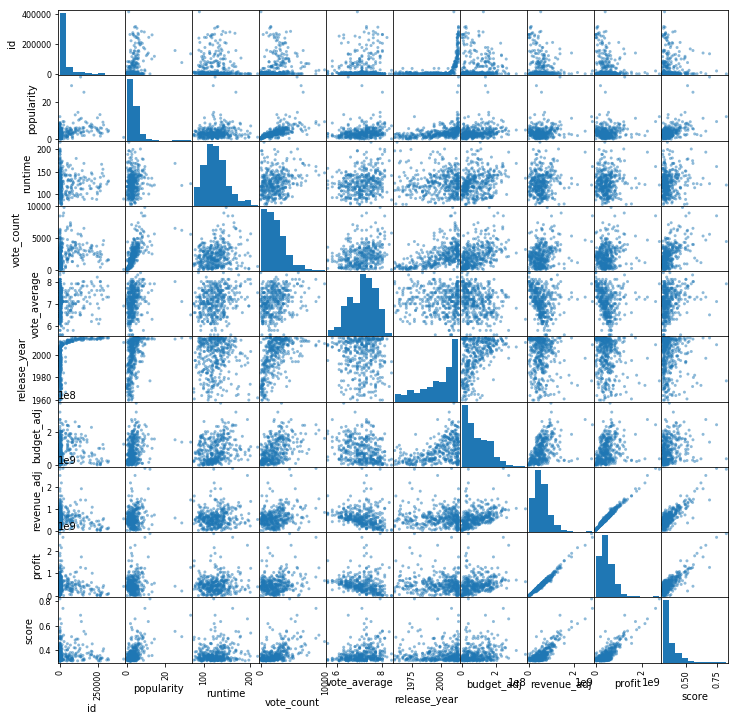

In [31]:
pd.plotting.scatter_matrix(df2_good,figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e50f16f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e49edc4e0>]], dtype=object)

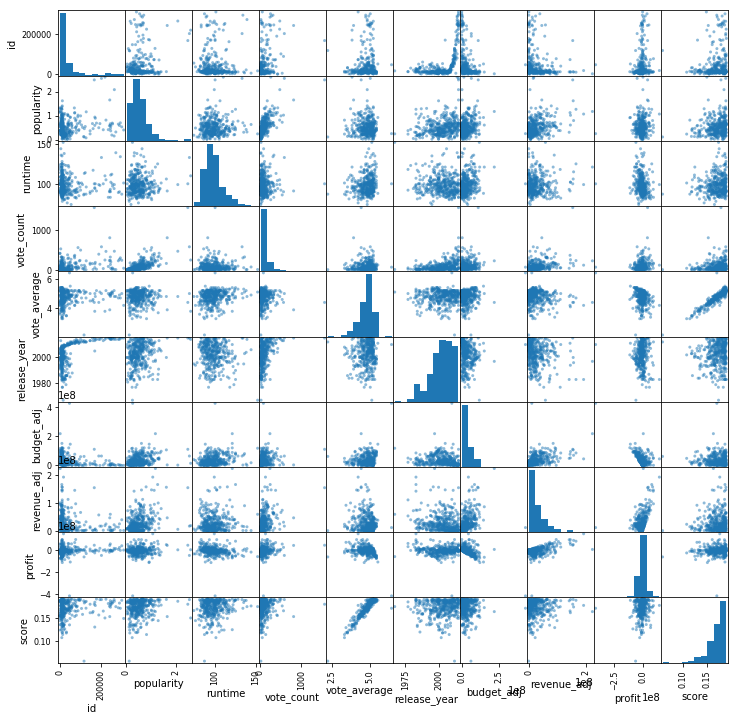

In [32]:
pd.plotting.scatter_matrix(df2_bad,figsize=(12,12))

Findings: 

1 The good movies have larger budget than bad movies.

2 The score and profit of the movies are positively related while bad movies don't have this relationship.

3 Good movies' mean popularity is 3.66 while bad movies' is 0.53. Good movies' mean score is 0.37 while bad movies' is 0.17. 

Take a look at the top directors based on good movies they produced.

In [10]:
df2_good.groupby('director')['id'].count().sort_values(ascending=False)[:10]

director
Steven Spielberg     14
Christopher Nolan     7
Quentin Tarantino     7
Michael Bay           6
James Cameron         6
Robert Zemeckis       6
Peter Jackson         6
Chris Columbus        5
Ridley Scott          5
George Lucas          5
Name: id, dtype: int64

Finding: The number one director is Steven Spielberg, who has produced 14 good movies. He has 7 more good movies than the director who's in second place. 

### Question 2: What's the relationship between popularity and profit?

Reasoning: Profit has tons of unique values and difficult to make charts to clearly show the relationship with popularity. So define four buckets and use bar chart to evaluate profit level

In [11]:
profit_level_bin=[-4.139124e+08,-1.359537e+06,2.861025e+07,1.090266e+08,2.750137e+09]
bin_name=['bottom','medium','medium to high','high']
df2['profit_level']=pd.cut(df2.profit,profit_level_bin,labels=bin_name)
df2.head()

,id,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,score,profit_level
1329,11,12.037933,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09,0.821069,high
1386,19995,9.432768,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,2.586237e+09,0.743165,high
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,0.687030,high
5231,597,4.355219,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,2.234714e+09,0.657196,high
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,0.635396,high


Relationship between profit level and popularity

In [12]:
pop_mean=df2.groupby('profit_level').mean()['popularity']

Text(0.5,1,'Relationship between profit level and popularity')

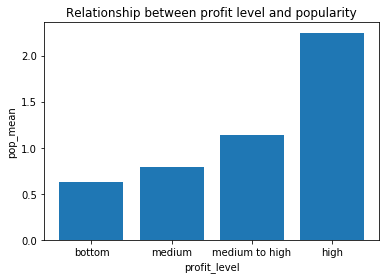

In [13]:
location=[1,2,3,4]
plt.bar(location,pop_mean,tick_label=bin_name)
plt.xlabel('profit_level')
plt.ylabel('pop_mean')
plt.title('Relationship between profit level and popularity')

Finding: Popularity and profit level have a positive relationship. High profit level has a high popularity on the average.

### Question 3: What's the overall trend of movie quantity and quality?

Reasoning: To better learn the qty of movies produced each year. Hist is the best chart to present.

Text(0.5,1,'Qty of movies over the year')

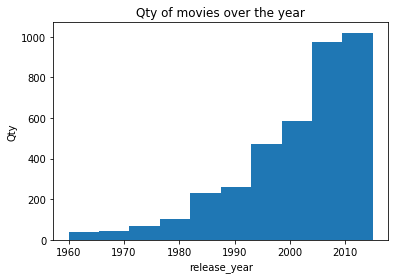

In [14]:
plt.hist(df2.release_year)
plt.xlabel('release_year')
plt.ylabel('Qty')
plt.title('Qty of movies over the year')

Finding: The quantity of movies is increasing rapidly over the past few years.

In [58]:
df_quality=df2.groupby('release_year')['score'].mean()

Reasoning: To better show the ups and downs and changes of quality over the years, line chart is the most obvious form of visualization.

Text(0.5,1,'Quality of movies over the year')

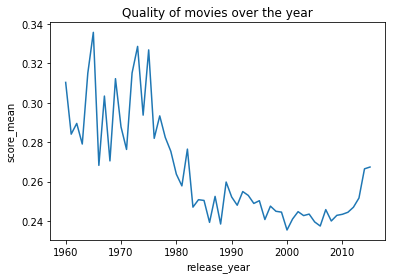

In [59]:
plt.plot(df_quality)
plt.xlabel('release_year')
plt.ylabel('score_mean')
plt.title('Quality of movies over the year')

Findings: While the qty of movies is surging over the past few decades, the quality of movies is not improving much. People seems to enjoy old movies better.
However, the quality improved a little after 2010, but still can't compete with the old movies released during 60s and 70s.

<a id='conclusions'></a>
## Conclusions
1 The good movies have larger budget than bad movies.

2 The score and profit of the movies are positively related while bad movies don't have this relationship.

3 Good movies' mean popularity is 3.66 while bad movies' is 0.53. Good movies' mean score is 0.37 while bad movies' is 0.17. 

4 The number one director is Steven Spielberg, who has produced 14 good movies. He has 7 more good movies than the director who's in second place. 

5 Popularity and profit level have a positive relationship. High profit level has a high popularity on the average.

6 While the qty of movies is surging over the past few decades, the quality of movies is not improving much. People seems to enjoy old movies better.
However, the quality improved a little after 2010, but still can't compete with the old movies released during 60s and 70s.


### Limitations:
Limitation 1: We dropped a lot of data because there are a large portion of movies whose budget_adj are 0 in the original data set. Accordingly, the number of samples will be largely decreased. And we may skew our analysis by dropping these data.

Limitations 2: For the calculation of movie score, I'm using different percent of weight to evaluate the importance of different factors related to a good movies. I put the profit at highest place, which is an objective assumption.

Limitation 3: We are doing our analysis based on the data set we have, but the lists we have may not contain all of the movies produced in the world. So the analysis of good movies/ bad movies as well as top directors may be biased.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])